In [ ]:
#!pip install --force jikanpy

  Using cached jikanpy-4.3.2-py3-none-any.whl (16 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached aiohttp-3.9.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.2 MB)
  Using cached simplejson-3.19.2-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (137 kB)
  Using cached attrs-23.1.0-py3-none-any.whl (61 kB)
  Using cached multidict-6.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (114 kB)
  Using cached yarl-1.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (300 kB)
  Using cached frozenlist-1.4.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (225 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
  Using cached async_timeout-4.0.3-py3-none-any.whl (5.7 kB)
  Using cached charset_normalizer-3.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (142 kB)
  Using cached idna-3.6-py3-none-any.whl (

In [ ]:
##from jikanpy import Apis
#import jikanpy
## Initialize Jikanpy API
##jikan = Apis()
#
#def get_anime_by_genre(genre):
#  """
#  Fetches anime list based on a given genre.
#
#  Args:
#      genre: String of the anime genre (e.g., "action", "comedy").
#
#  Returns:
#      List of dictionaries containing anime information.
#  """
#  #return jikan.search.anime(genre=genre, sort="score", order="desc").results
#
#def get_anime_info(anime_id):
#  """
#  Retrieves detailed information for a specific anime.
#
#  Args:
#      anime_id: Integer ID of the anime.
#
#  Returns:
#      Dictionary containing detailed anime information.
#  """
#  #return jikan.anime(anime_id).result
#
#def recommend_anime(genre, favorite_anime):
#  """
#  Recommends anime based on user preferences.
#
#  Args:
#      genre: String of the preferred genre.
#      favorite_anime: String title of the user's favorite anime.
#
#  Returns:
#      List of dictionaries containing recommended anime information.
#  """
#  # Get anime based on genre
#  anime_list = get_anime_by_genre(genre)
#
#  # Filter out already seen anime (assuming title is unique)
#  filtered_list = [anime for anime in anime_list if anime["title"] != favorite_anime]
#
#  # Get detailed info for top 3 recommendations
#  recommendations = [get_anime_info(anime["mal_id"]) for anime in filtered_list[:3]]
#
#  return recommendations
#
## Get user input
#user_genre = input("Enter your preferred anime genre: ")
#user_favorite = input("Enter your favorite anime title: ")
#
## Generate recommendations
#recommended_anime = recommend_anime(user_genre, user_favorite)
#
## Print recommendations
#print("Based on your preferences, you might enjoy:")
#for anime in recommended_anime:
#  print(f"- {anime['title']} ({anime['score']}) - {anime['synopsis']}")
#
#

Enter your preferred anime genre: action


In [ ]:
from google.colab import files
upload = files.upload()

KeyboardInterrupt: ignored

In [ ]:
upload2 = files.upload()

Saving rating.csv to rating.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [ ]:
df = pd.read_csv('rating.csv')
anime = pd.read_csv('anime.csv')

In [ ]:
# merging two datasets
df = pd.merge(df,anime.drop('rating',axis=1),on='anime_id')
df.head()


,user_id,anime_id,rating,name,genre,type,episodes,members
0,1,20,-1.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
1,3,20,8.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
2,5,20,6.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
3,6,20,-1.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
4,10,20,-1.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297


In [ ]:
# Anime sorted by watching
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Death Note                            4349
Shingeki no Kyojin                    3396
Sword Art Online                      3336
Code Geass: Hangyaku no Lelouch       3203
Elfen Lied                            3134
Fullmetal Alchemist                   2935
Naruto                                2928
Code Geass: Hangyaku no Lelouch R2    2874
Angel Beats!                          2779
Toradora!                             2656
Name: rating, dtype: int64

In [ ]:
# DA
ratings = pd.DataFrame(df.groupby('name')['rating'].mean())
ratings['num_of_ratings'] = pd.DataFrame(df.groupby('name')['rating'].count())

genre_dict = pd.DataFrame(data=anime[['name','genre']])
genre_dict.set_index('name',inplace=True)

In [ ]:
ratings.head()

,rating,num_of_ratings
name,,
&quot;0&quot;,2.545455,11
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,5.982051,390
&quot;Bungaku Shoujo&quot; Memoire,6.125000,424
&quot;Bungaku Shoujo&quot; Movie,6.422680,776
&quot;Eiji&quot;,6.428571,7


(0.0, 3000.0)

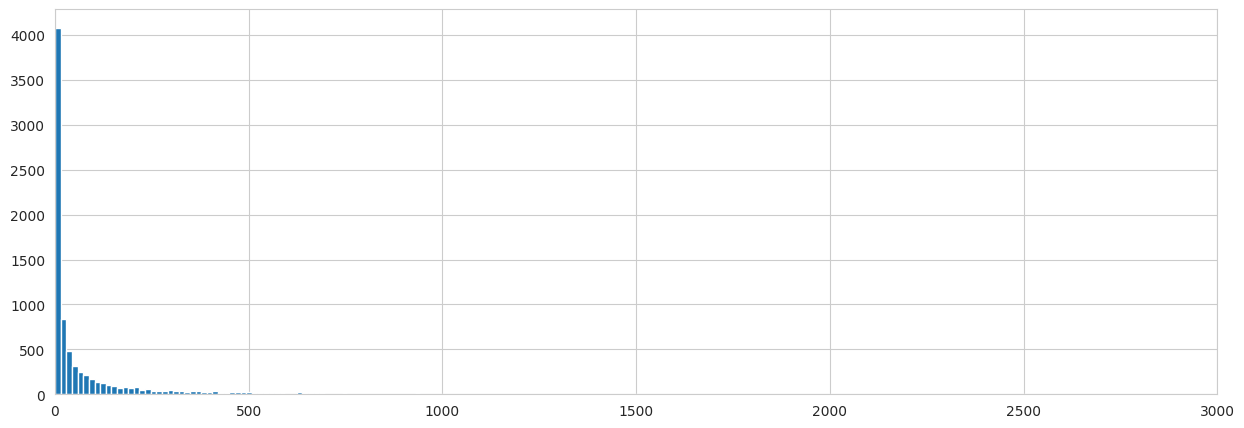

In [ ]:
plt.figure(figsize=(15,5))
ratings['num_of_ratings'].hist(bins=300)
plt.xlim(0,3000)

<Axes: >

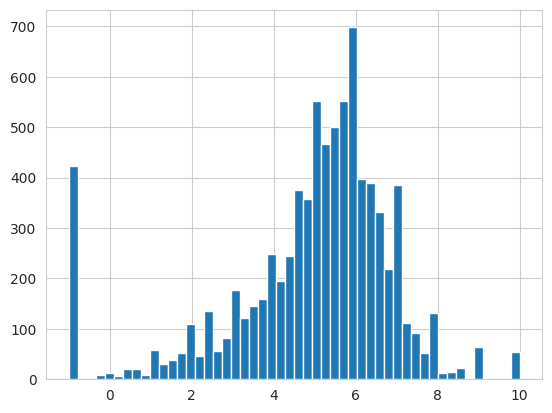

In [ ]:
ratings['rating'].hist(bins=50)

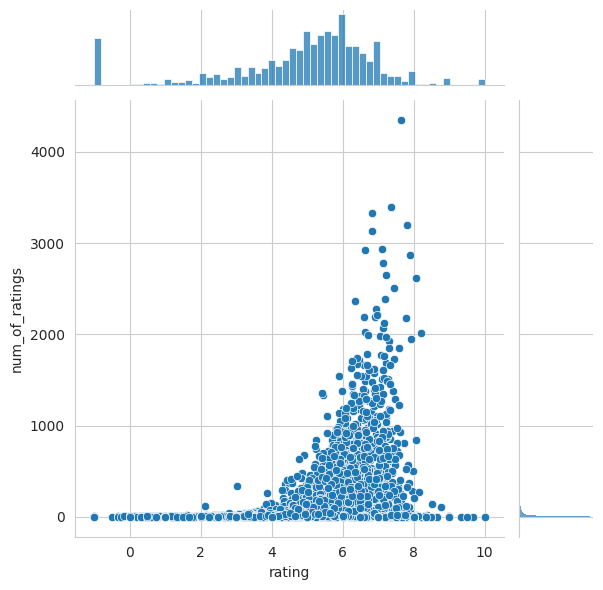

In [ ]:
sns.jointplot(x='rating' ,y='num_of_ratings', data=ratings)

In [ ]:
# Function creation
def check_genre(genre_list,string):
  if any(x in string for x in genre_list):
    return True
  else:
    return False

def get_recommendation(name):
  # generating list of anime with same genre with target
  anime_genre = genre_dict.loc[name].values[0].split(',')
  cols = anime[anime['genre'].apply(
      lambda x: check_genre(anime_genre,str(x)))]['name'].tolist()

  #create matrix based on generated list
  animemat = df[df['name'].isin(cols)].pivot_table(
      index = 'user_id',columns='name',values='rating')

  # create correlation table
  anime_user_rating = animemat[name]
  similiar_anime = animemat.corrwith(anime_user_rating)
  corr_anime = pd.DataFrame(similiar_anime,columns=['correlation'])
  corr_anime = corr_anime.join(ratings['num_of_ratings'])
  corr_anime.dropna(inplace=True)
  corr_anime = corr_anime[corr_anime['num_of_ratings']>3000].sort_values(
      'correlation',ascending=False)

  return corr_anime.head(10)

In [ ]:
# Testing
get_recommendation('Naruto')

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,correlation,num_of_ratings
name,,
Naruto,1.000000,12767
Bleach,0.718745,6684
Katekyo Hitman Reborn!,0.717236,3565
Shaman King,0.707205,3801
Shakugan no Shana,0.698595,5672
Rurouni Kenshin: Meiji Kenkaku Romantan,0.697615,3624
Pandora Hearts,0.696069,3783
D.Gray-man,0.695197,4435
Shakugan no Shana II (Second),0.691846,4200


In [ ]:
get_recommendation('Bleach')

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,correlation,num_of_ratings
name,,
Bleach,1.000000,6684
Beelzebub,0.739042,3092
Katekyo Hitman Reborn!,0.735917,3565
Ao no Exorcist,0.727704,11331
Fairy Tail,0.721856,6593
Ben-To,0.720954,3094
Naruto,0.718745,12767
Black★Rock Shooter (TV),0.710233,4177
Sora no Otoshimono: Forte,0.702656,3517


In [ ]:
get_recommendation('Shingeki no Kyojin')

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,correlation,num_of_ratings
name,,
Shingeki no Kyojin,1.000000,15373
Suisei no Gargantia,0.753031,3382
Kami nomi zo Shiru Sekai: Megami-hen,0.748043,3227
Blood Lad,0.737233,4596
Maoyuu Maou Yuusha,0.730560,3054
Sankarea,0.726048,4679
Sakurasou no Pet na Kanojo,0.725300,6278
Btooom!,0.722861,6393
Hataraku Maou-sama!,0.722087,7579


In [ ]:
get_recommendation('Shaman King')

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,correlation,num_of_ratings
name,,
Shaman King,1.000000,3801
Hidan no Aria,0.768930,3765
Yuu☆Yuu☆Hakusho,0.768305,3260
Kämpfer,0.765460,3365
Rurouni Kenshin: Meiji Kenkaku Romantan,0.755418,3624
Sekirei,0.752936,4011
Sora no Otoshimono: Forte,0.744335,3517
Toaru Majutsu no Index II,0.740592,4023
Love Hina,0.740228,3553


In [ ]:
get_recommendation('Chihayafuru')

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,correlation,num_of_ratings
name,,
Ano Natsu de Matteru,0.755005,3298
Bakuman. 2nd Season,0.741163,3214
Gosick,0.736016,3785
Hyouka,0.730768,5672
K-On!!,0.726611,5029
Danshi Koukousei no Nichijou,0.725302,4322
Chuunibyou demo Koi ga Shitai!,0.725222,7444
Boku wa Tomodachi ga Sukunai Next,0.724181,4995
Kokoro Connect,0.715312,4855


from matplotlib import pyplot as plt
_df_0['correlation'].plot(kind='hist', bins=20, title='correlation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['num_of_ratings'].plot(kind='hist', bins=20, title='num_of_ratings')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='correlation', y='num_of_ratings', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['correlation'].plot(kind='line', figsize=(8, 4), title='correlation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['num_of_ratings'].plot(kind='line', figsize=(8, 4), title='num_of_ratings')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
get_recommendation('Mushishi')

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,correlation,num_of_ratings
name,,
Mushishi,1.000000,3399
Ookami to Koushinryou II,0.733012,4248
Samurai Champloo,0.729213,6681
Ookami to Koushinryou,0.723186,5822
Natsume Yuujinchou,0.711859,3029
Working!!,0.703007,3617
Kami nomi zo Shiru Sekai: Megami-hen,0.702799,3227
Shiki,0.698615,4224
Kami nomi zo Shiru Sekai II,0.698525,5075


In [ ]:
get_recommendation('Kimi ni Todoke')

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,correlation,num_of_ratings
name,,
Kimi ni Todoke,1.000000,5781
Kimi ni Todoke 2nd Season,0.881584,4102
Kämpfer,0.759238,3365
Ano Natsu de Matteru,0.746295,3298
Kami nomi zo Shiru Sekai,0.745886,6401
Kami nomi zo Shiru Sekai II,0.744250,5075
Nyan Koi!,0.744235,3458
Ichiban Ushiro no Daimaou,0.740455,4708
Hyouka,0.740326,5672
